# Curso OPenNDAP y Xarray con Python
## Contenido

- [Herramientas](#Herramientas)
- [Librerías](#Librerías)
- [Acceder a los datos](#Acceder-a-los-datos)
- [Explorando los datos con xarray](#Explorando-los-datos-con-xarray)
    - [Seleccionando los datos](#Seleccionando-los-datos)
    - [Gráficas](#Gráficas)
- [Operaciones con xarray](#Operaciones-con-xarray)
    - [Aggregation](#Aggregation)
    - [Interpolation](#Interpolation)
    - [Rolling](#Rolling)
    - [Group by](#Group-by)
    - [Función map](#Función-map) 
    - [Resample](#Resample)
-[Escribir un netcdf](#Escribir-un-netcdf)
-[Exportar](#Exportar)

# Herramientas
[OPeNDAP](https://www.opendap.org/) Es un acrónimo para "Open-source Project for a Network Data Access Protocol", un protocolo de acceso a datos científicos que pueden ser procesados con xarray.


[Pydap](https://www.pydap.org/en/latest/) Es una librería de Python que implementa el protocolo de acceso a OPeNDAP.

[Numpy](https://numpy.org/) Es una librería de python para realizar cálculos científicos.

[Pandas](https://pandas.pydata.org/) Es una liberría de python para manipulación de datos en forma de tabla por medio de etiquetas e índices.

[xarray](https://docs.xarray.dev/en/stable/) es una librería de Python que permite trabajar con arreglos de datos multidimensionales en formato nedcdf:

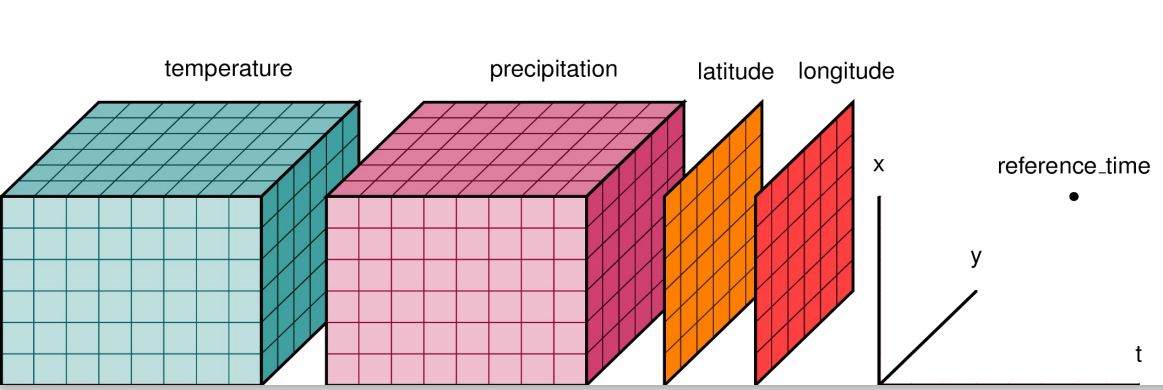

- xarray introduce etiquetas en la forma de dimensiones, coordinadas y atributos sobre arrays tipo NumPy.
- Permite aplicar una serie de operaciones matemáticas sobre los datos.
- Seleccionar variables por nombre.
- Dividir o reagrupar datos 
- Posee soporte para el análisis de datos en remoto via OpenDAP



# Librerías

Vamos a utilizar `xarray`, `pydap`, `numpy`, `pandas`,`datetime`

In [97]:
import xarray as xr
from pydap.cas.get_cookies import setup_session
from pydap.client import open_url
from datetime import datetime
import numpy as np
import pandas as pd

# Acceder a los datos
Ahora nos conectaremos a CMENS y accederemos a ciertos datos.Para esto, necesitamos un perfil en cmems con nombre de usuario y password y el url de los datos.

In [100]:
url = "https://my.cmems-du.eu/thredds/dodsC/cmems_mod_ibi_wav_my_0.05deg-2D_PT1H-i"
username = "***" 
password = "***"

Una vez creado el perfil, podemos acceder a los datos, para esto utilizamos la función `setup_session` de `pydap` para iniciar sesión con nuestro nombre de usuario y password y luego accedemos a los datos en formato nedcf con la función `PydapDataStore` de xarray. Por último, abrimos el dataset con `open_dataset`.

In [101]:
print('Iniciando sesión')
cas_url = "https://cmems-cas.cls.fr/cas/login"
session = setup_session(cas_url, username, password)
session.cookies.set("CASTGC", session.cookies.get_dict()["CASTGC"])

print('Accediendo a los datos')
data_store = xr.backends.PydapDataStore(open_url(url, session=session))
ds = xr.open_dataset(data_store)
ds

Iniciando sesión
Accediendo a los datos


<xarray.Dataset>
Dimensions:    (latitude: 601, longitude: 481, time: 254184)
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
  * time       (time) datetime64[ns] 1993-01-01 ... 2021-12-30T23:00:00
Data variables: (12/17)
    VHM0       (time, latitude, longitude) float32 ...
    VHM0_SW1   (time, latitude, longitude) float32 ...
    VHM0_SW2   (time, latitude, longitude) float32 ...
    VHM0_WW    (time, latitude, longitude) float32 ...
    VMDR       (time, latitude, longitude) float32 ...
    VMDR_SW1   (time, latitude, longitude) float32 ...
    ...         ...
    VTM01_SW1  (time, latitude, longitude) float32 ...
    VTM01_SW2  (time, latitude, longitude) float32 ...
    VTM01_WW   (time, latitude, longitude) float32 ...
    VTM02      (time, latitude, longitude) float32 ...
    VTM10      (time, latitude, longitude) float32 ...
    VTPK       (time, latitude, longitude) float32 ...
Attributes: (12/19)
    Conventions:    CF-1.0
    institution:    Nologin-Puertos del Estado-MeteoFrance
    title:          CMEMS IBI MULTI-YEAR REANALYSIS: HOURLY WAVE PRODUCTS
    easting:        longitude
    northing:       latitude
    references:     http://marine.copernicus.eu/
    ...             ...
    latitude_min:   26.f
    latitude_max:   56.f
    z_min:          0.0f
    z_max:          0.0f
    contact:        mailto: servicedesk.cmems@mercator-ocean.eu
    source:         IBI-MFC (Operational Production Center)

El data set contiene múltiples arrays multidimensionales (variables) y metadata.

# Explorando los datos con xarray

In [102]:
#get information about the coordinates
ds.coords
#get information about the variables
ds.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:    (latitude: 601, longitude: 481, time: 254184)
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
  * time       (time) datetime64[ns] 1993-01-01 ... 2021-12-30T23:00:00
Data variables: (12/17)
    VHM0       (time, latitude, longitude) float32 ...
    VHM0_SW1   (time, latitude, longitude) float32 ...
    VHM0_SW2   (time, latitude, longitude) float32 ...
    VHM0_WW    (time, latitude, longitude) float32 ...
    VMDR       (time, latitude, longitude) float32 ...
    VMDR_SW1   (time, latitude, longitude) float32 ...
    ...         ...
    VTM01_SW1  (time, latitude, longitude) float32 ...
    VTM01_SW2  (time, latitude, longitude) float32 ...
    VTM01_WW   (time, latitude, longitude) float32 ...
    VTM02      (time, latitude, longitude) float32 ...
    VTM10  

## Seleccionando los datos

In [103]:
#select a variable 
VHM0 = ds['VHM0']
VHM0 = ds.VHM0

In [116]:
VHM0.latitude

<xarray.DataArray 'latitude' (latitude: 601)>
array([26.  , 26.05, 26.1 , ..., 55.9 , 55.95, 56.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 26.0 26.05 26.1 26.15 ... 55.85 55.9 55.95 56.0
Attributes:
    standard_name:        latitude
    long_name:            Latitude
    units:                degrees_north
    axis:                 Y
    unit_long:            Degrees North
    step:                 0.05f
    _CoordinateAxisType:  Lat
    _ChunkSizes:          601

In [ ]:
#index space
VHM0.isel(time=-1)
VHM0.isel(time=0)
VHM0[0,:,:]
#VHM0[0,:,0].values

In [ ]:
# selecting values using vectorized index
VHM0[[0,10],[0,1],[0,20]]

In [ ]:
#check which axis is a coordinate
VHM0.get_axis_num("latitude")

In [ ]:
#label space
VHM0.sel(time='1993-01-01T00:00:00.000000000')
VHM0.loc['1993-01-01T00:00:00.000000000', :, :]
VHM0.sel(latitude=26)
VHM0.loc[:, 26, :]

In [ ]:
# Select a variable and make temporal subset
subset_ds = ds.get("VHM0")
subset_ds = subset_ds.sel(time=slice(datetime(1999,1,1), datetime(1999,2,1)))
subset_ds

El método sel() posee los argumentos ''method'' y ''tolerance'' que permiten la búsqueda de vecinos cercanos.

In [ ]:
VHM0.sel(time=['2021-12-20T23:00:00','2021-12-30T23:00:00'], method="nearest", tolerance=0.2)
VHM0.sel(latitude=[26,31], method="nearest", tolerance=0.2)

# Gráficas

In [ ]:
#variable vs time
VHM0[0:100,0,0].plot()

In [ ]:
#variable vs Longitude
VHM0[0,0,:].plot()

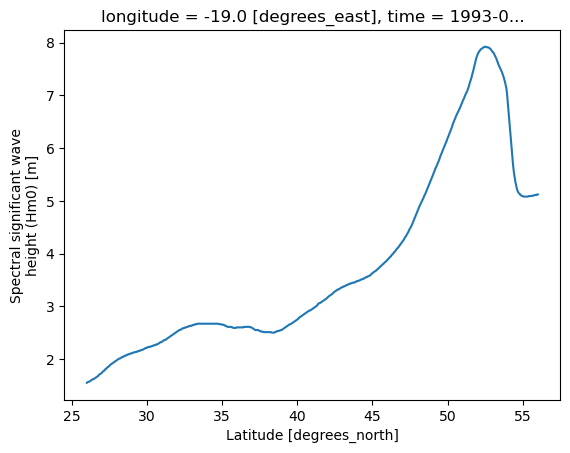

In [63]:
#variable vs Latitude
VHM0[0,:,0].plot()

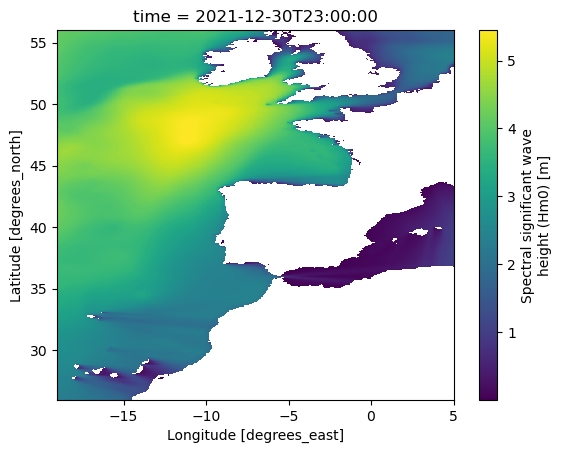

In [110]:
VHM0.sel(time='2021-12-30T23:00:00').plot()

C:\Users\turlionear\Anaconda3\envs\curso\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\turlionear\Anaconda3\envs\curso\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


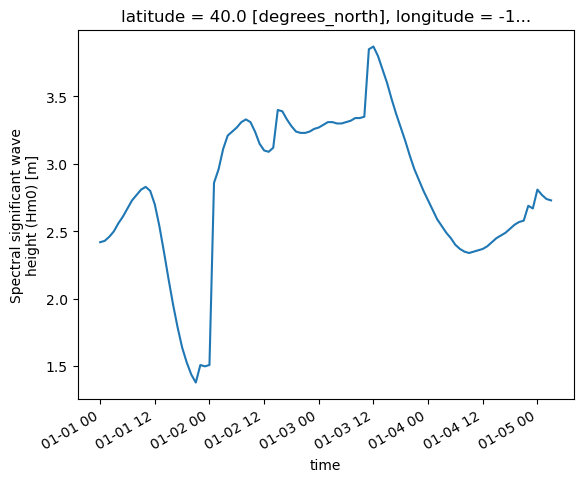

In [119]:
VHM0[0:100,:,:].sel(longitude=-15, latitude=40, method="nearest").plot()

# Operaciones con xarray

In [ ]:
# Check if values are in array
VHM0[0,0:10,0].isin([1.55,1.56, 1.57,1.58])

#choose an small subset of one the variable to test the operations
subset= VHM0[0:10,0:10,0:10]


#substraction
#subset -5

#np.sin(subset)

#xr.where(subset > 0, "positive", "negative")

#matrix multiplication
#subset @ subset

#subset.round(2)

#missing values
#subset.isnull()

#Aggregation
#subset.sum(dim="latitude")

#subset.get_axis_num("latitude")

#subset.mean()

# Rolling window operations
#subset.rolling(latitude=1)

#resampling
monthly=subset.resample(time="M").mean()
monthly.plot()

## Interpolation

In [77]:
latitudes=VHM0[0,-100:-50,0]['latitude'].values+0.5
VHM0_int_linear = VHM0[0,-100:-50,0].interp(latitude=latitudes, method='linear')
VHM0_int_cubic = VHM0[0,-100:-50,0].interp(latitude=latitudes, method='cubic')
VHM0_int_cubic = VHM0[0,-100:-50,0].interp(latitude=latitudes, method='cubic')

C:\Users\turlionear\Anaconda3\envs\curso\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\turlionear\Anaconda3\envs\curso\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")


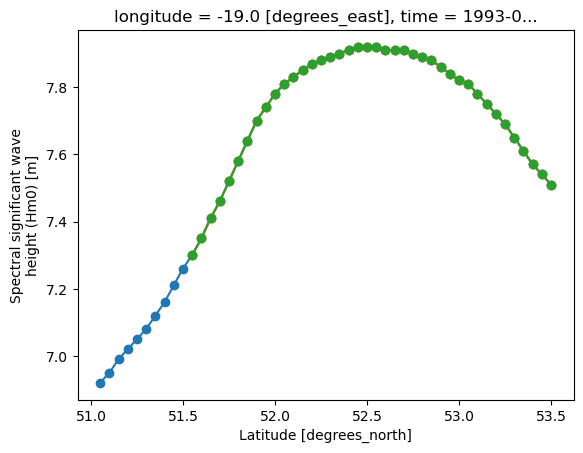

In [78]:
VHM0[0,-100:-50,0].plot(marker='o')
VHM0_int_linear.plot(marker='o', label='linear')
VHM0_int_cubic.plot(marker='o', label='cubic')

## Rolling

In [33]:
## Rolling windows in time with a certain size
VHM0_r1=VHM0[0:100,0,0].rolling(time=3, center=True).mean() #windows size equal 3
VHM0_r2=VHM0[0:100,0,0].rolling(time=10, center=True).mean()#windows size equal 10

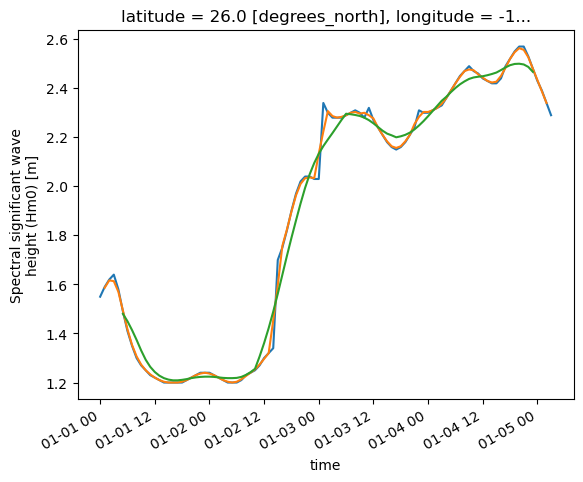

In [41]:
VHM0[0:100,0,0].plot()
VHM0_r1.plot()
VHM0_r2.plot()

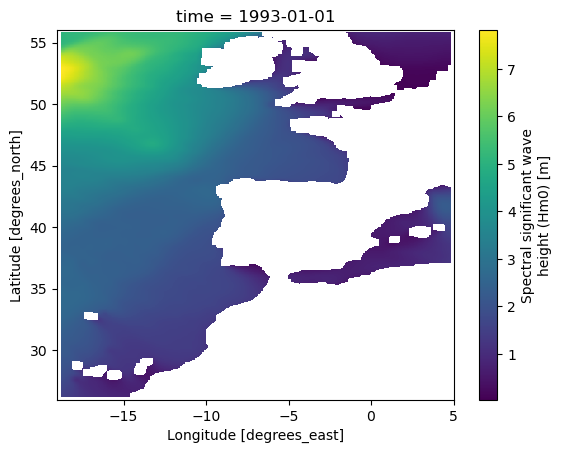

In [48]:
VHM0[0,:,:].rolling(latitude=10, longitude=10, center=True).mean().plot()

## Group by

In [129]:
group_by=VHM0[0:1000,0,0].groupby(VHM0[0:1000,0,0].time.dt.month)
group_by

DataArrayGroupBy, grouped over 'month'
2 groups with labels 1, 2.

In [130]:
group_by

DataArrayGroupBy, grouped over 'month'
2 groups with labels 1, 2.

In [131]:
for group_name, group_da in group_by:
    print(group_name)
    #print(group_da.values[0:10])

1
2


## Función map 

In [133]:
group_by.map(np.mean)

<xarray.DataArray 'VHM0' (month: 2)>
array([2.1679435, 1.6364452], dtype=float32)
Coordinates:
    latitude   float32 26.0
    longitude  float32 -19.0
  * month      (month) int64 1 2

In [95]:
def time_mean(a):
    return a.mean(dim='time')

group_by.apply(time_mean)

<xarray.DataArray 'VHM0' (month: 2)>
array([2.1679435, 1.6364452], dtype=float32)
Coordinates:
    latitude   float32 26.0
    longitude  float32 -19.0
  * month      (month) int64 1 2

## Aggregation

Group by admite múltiples operaciones de agregación.

In [109]:
#group_by.mean(dim='time')
#group_by.min(dim='time')
#group_by.max(dim='time')
group_by.std(dim='time')

<xarray.DataArray 'VHM0' (month: 2)>
array([0.45746443, 0.32402053])
Coordinates:
    latitude   float32 26.0
    longitude  float32 -19.0
  * month      (month) int64 1 2

## Resample

In [146]:
VHM0_resample = VHM0[0:1000,:,:].resample(time='48H').mean(dim='time')

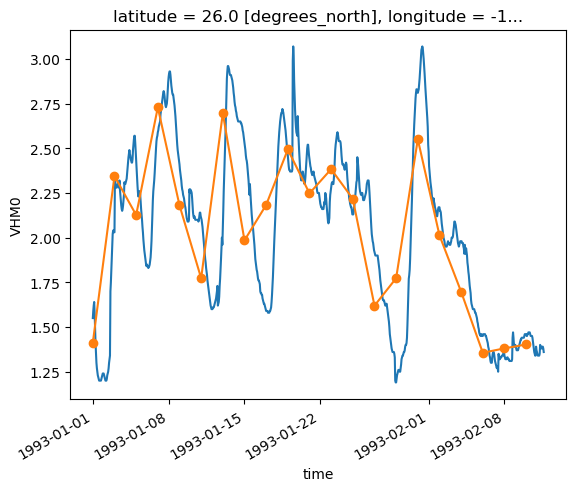

In [153]:
VHM0[0:1000,0,0].plot()
VHM0_resample[:,0,0].plot(marker='o')

## Coarsen

In [157]:
VHM0_c = VHM0[0:1000,:,:].coarsen(time=100).mean()

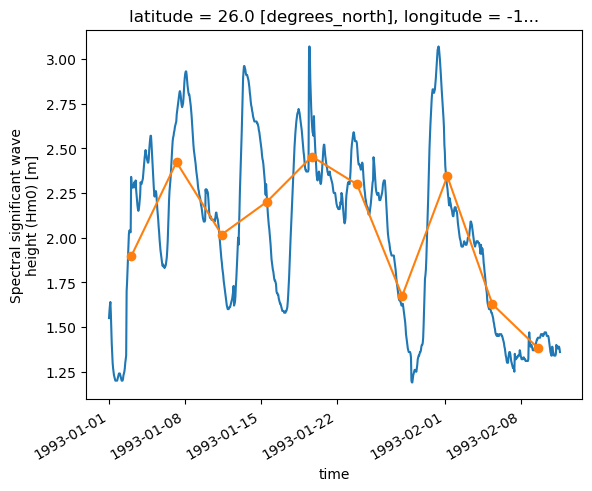

In [163]:
VHM0[0:1000,0,0].plot()
VHM0_c[:,0,0].plot(marker='o')

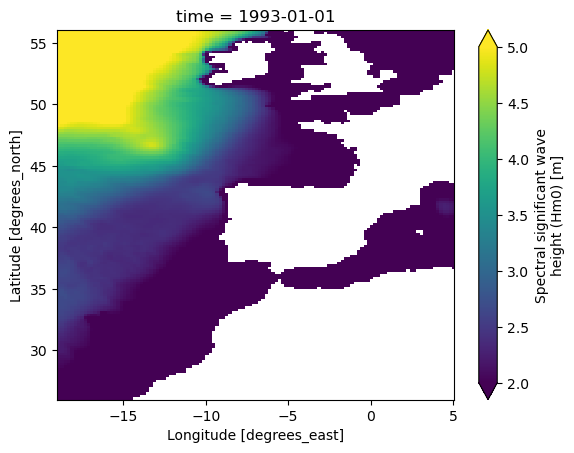

In [174]:
VHM0_coarse.isel(time=0).plot(vmin=2, vmax=5)

# Escribir un netcdf

In [ ]:
# Write netcdf
VHM0[0,0:10,0:10].to_netcdf("VHM0.nc")
VHM0[0,0:10,0:10]

In [ ]:
VHM0[0,0:10,0:10]

In [ ]:
df=VHM0[0,0:10,0:10].to_dataframe()
df

Aparición de NaN's: no hay un valor asignado de la variable en cuestion para cada posible combinacion de coordenadas. Esto sucede cuando se pasa de una tabla a cubo.

# Exportar

In [ ]:
# Export to other formats... 
df.to_csv("VHM0.csv")
df.to_html("VHM0.html")

# Check arguments in libraries docuemntation for more options...
df.to_json("VHM0.json", orient="records", indent=4)